### 영상에서 이미지 추출하기

1. 영상 불러오기

In [1]:
import cv2

filepath = './avi_data/cat.mp4'
video = cv2.VideoCapture(filepath)

if not video.isOpened():
 print("Video is unavailable :", filepath)
 exit(0)


2. 영상 정보 확인

* cv2.VideoCapture.get(propld)  
    카메라, 비디오 장치 속성 값 반환 함수

* propld 속성 종류  
    CAP_PROP_FRAME_WIDTH : 프레임 가로 크기  
    CAP_PROP_FRAME_HEIGHT : 프레임 세로 크기  
    CAP_PROP_FPS : 초 당 프레임 수  
    CAP_PROP_FRAME_COUNT : 비디오 파일의 총 프레임 수  
    CAP_PROP_POS_MSEC : 밀리 초 단위로 현재 위치  
    CAP_PROP_POS_FRAMES : 현재 프레임 번호  
    CAP_PROP_EXPOSURE : 노출  


In [3]:
import cv2

filepath = './avi_data/cat.mp4'
video = cv2.VideoCapture(filepath)

if not video.isOpened():
 print("Video is unavailable :", filepath)
 exit(0)

length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video.get(cv2.CAP_PROP_FPS)

print("length :", length)
print("width :", width)
print("height :", height)
print("fps :", fps)

length : 702
width : 640
height : 360
fps : 29.97002997002997


3. 영상을 프레임으로 나눠 이미지로 저장

>    * 이미지를 저장할 폴더 생성

In [4]:
import os
import cv2

filepath = './avi_data/cat.mp4'

try:
    # 파일이름의 확장자를 제거한 폴더를 생성
    if not os.path.exists(filepath[:-4]):
        os.makedirs(filepath[:-4])
        
except OSError:
    print('Error: Creating directory' + filepath[:-4])

>결과  
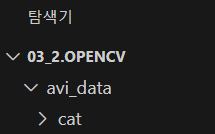

>    * 영상을 프레임으로 나누어 저장

In [ ]:
import cv2

filepath = './avi_data/cat.mp4'
video = cv2.VideoCapture(filepath)

if not video.isOpened():
    print("Video is unavailable :", filepath)
    exit(0)
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

while(video.isOpened()):
    ret, image = video.read()

    cv2.imwrite(filepath[:-4] + "/frame%d.jpg" % video.get(1), image)
    print('Saved frame number :', str(int(video.get(1))))

    if int(video.get(1)) == length:
        video.release()
        break

>결과  
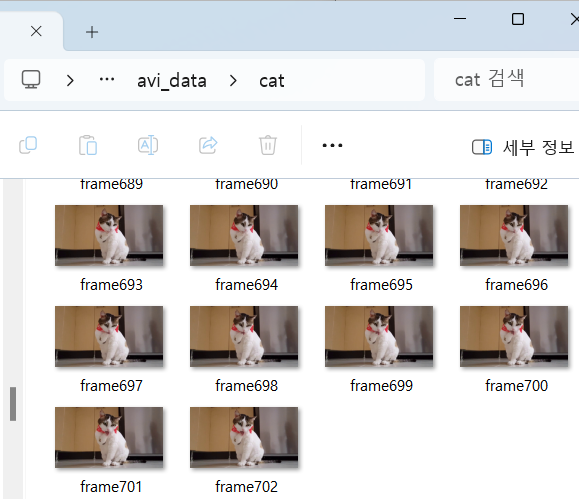

>    * 1초에 1개의 프레임을 저장

In [ ]:
import cv2

filepath = './avi_data/cat.mp4'
video = cv2.VideoCapture(filepath)

if not video.isOpened():
    print("Video is unavailable :", filepath)
    exit(0)
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

while(video.isOpened()):
    ret, image = video.read()

    if(int(video.get(1)) % int(fps) == 0):
        cv2.imwrite(filepath[:-4] + "/frame_s_%d.jpg" % video.get(1), image)
        print('Saved frame number :', str(int(video.get(1))))
        count += 1

    if int(video.get(1)) == length:
        video.release()
        break

>결과  
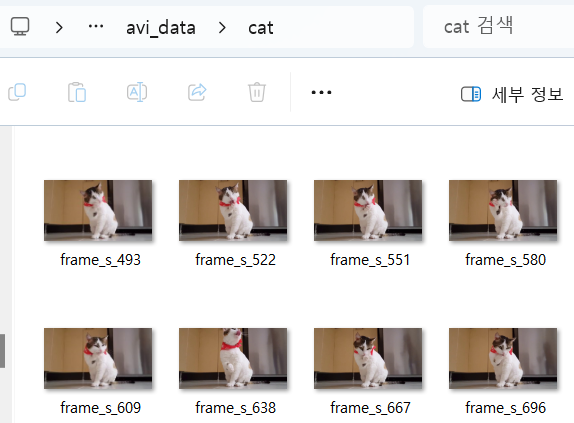

### 영상처리하기

1. 영상을 반전하여 출력하기

In [6]:
import cv2

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if ret is True:
        
        # 프레임 반전
        inversed = ~frame
        
        cv2.imshow('frame', frame)
        cv2.imshow('inversed', inversed)
        if cv2.waitKey(15) == 27:
            break
    else:
        print('error 발생')
        exit()
        
cap.release()
cv2.destroyAllWindows()

>결과  
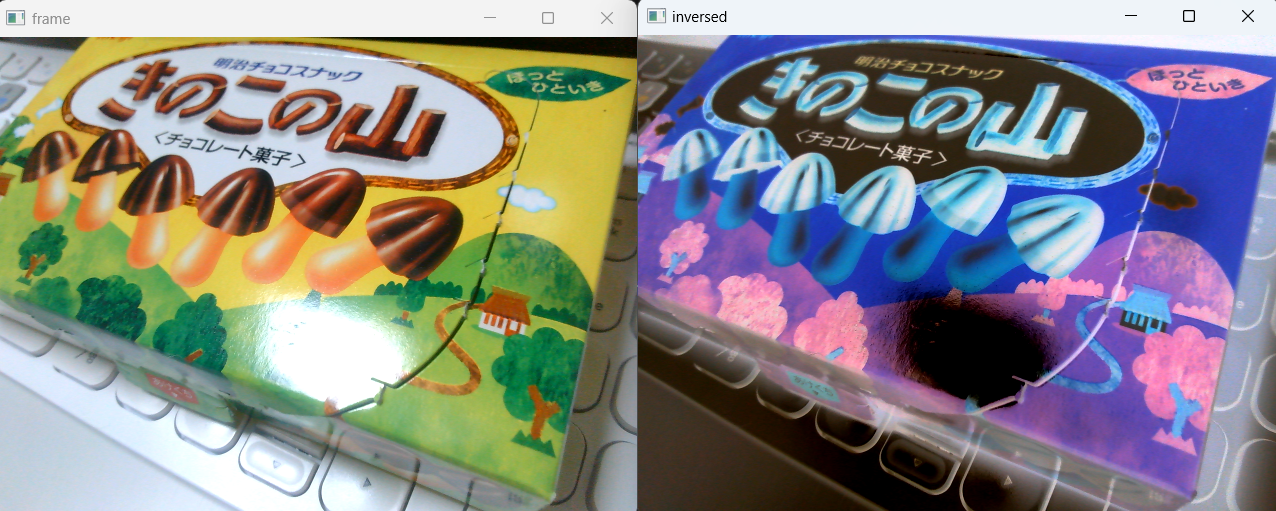

> 미션 : 영상을 그레이스케일로 출력하기  
  
        웹캠을 통해 영상을 읽어와 흑백으로 변환한 후 화면에 표시하는 기능을 수행합니다.   
        사용자가 'q' 키를 누르면 프로그램이 종료됩니다.

> 미션 완성 코드

3. 영상을 저장하기 위해 필요한 코드

In [ ]:
# 비디오 저장을 위한 코덱 및 VideoWriter 객체 정의
fourcc = cv.VideoWriter_fourcc(*'XVID')     # 코덱 설정
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640, 480))    # 녹화 파일 설정 (파일명, 코덱, FPS, 해상도)

# 프레임을 파일에 쓰기
out.write(frame)
   
# 리소스 해제
out.release()